# Signal Generator

## SSI Clock rates

SSI uses an even divider of the system clock. System clock is 80 MHz. Max DAC clock is 20 MHz. Max divisor is $254 \cdot 256$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
SysClk = 80e6
MinDivisor = 2
MaxDivisor = 254*256

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.DataFrame({"divisor": np.arange(MinDivisor, 16+1, 2)})
data["bit rate"] = SysClk / data["divisor"]

In [5]:
#display(data)

2 channels, 16 bits per sample

In [6]:
channels = 2
sample_bits = 16

In [7]:
data["sample rate"] = data["bit rate"] / sample_bits / channels

In [8]:
display(data)

,divisor,bit rate,sample rate
0,2,4.000000e+07,1.250000e+06
1,4,2.000000e+07,6.250000e+05
2,6,1.333333e+07,4.166667e+05
3,8,1.000000e+07,3.125000e+05
4,10,8.000000e+06,2.500000e+05
5,12,6.666667e+06,2.083333e+05
6,14,5.714286e+06,1.785714e+05
7,16,5.000000e+06,1.562500e+05


In [9]:
memory_size = 2000
sample_bytes = 2
sample_memory = memory_size / sample_bytes / channels

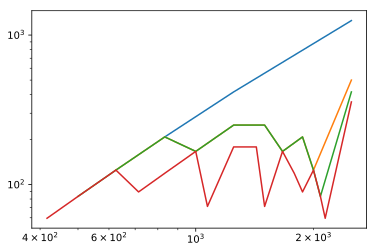

In [10]:
a = np.asarray([1/2, 1/4, 1/6, 1/8])
a.sort()
b = np.asarray([1/2, 1/4, 1/6, 2/6, 1/8, 3/8, 1/10, 2/10, 3/10, 4/10])
b.sort()
c = np.asarray([1/2, 1/4, 1/6, 2/6, 1/8, 3/8, 1/10, 2/10, 3/10, 4/10, 1/12, 5/12])
c.sort()
d = np.asarray([1/2, 1/4, 1/6, 2/6, 1/8, 3/8, 1/10, 2/10, 3/10, 4/10, 1/12, 5/12, 1/14, 2/14, 3/14, 4/14, 5/14, 6/14])
d.sort()

f = 5000
plt.loglog(f*a[1:], np.diff(a*f))
plt.loglog(f*b[1:], np.diff(b*f))
plt.loglog(f*c[1:], np.diff(c*f))
plt.loglog(f*d[1:], np.diff(d*f))


In [11]:
full_memory_data = pd.DataFrame({"signal frequency": data["sample rate"] / sample_memory})
display(full_memory_data)

,signal frequency
0,2500.000000
1,1250.000000
2,833.333333
3,625.000000
4,500.000000
5,416.666667
6,357.142857
7,312.500000


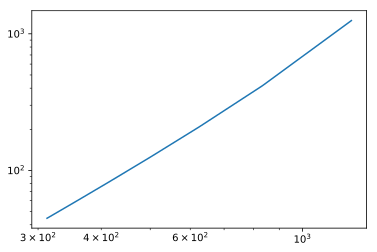

In [12]:
plt.loglog(full_memory_data["signal frequency"][1:], full_memory_data["signal frequency"].diff().abs()[1:])

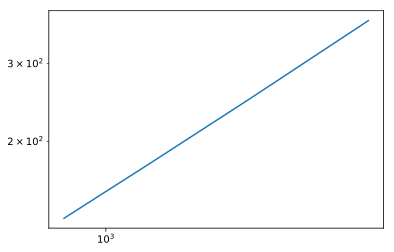

In [13]:
array = full_memory_data["signal frequency"] * 3
plt.loglog(array[4:], array.diff().abs()[4:])

In [14]:
#np.arange(MinDivisor, 400+1, 2) * np.arange(1, 4, 2)

ValueError: operands could not be broadcast together with shapes (200,) (2,) 

Slew rate 0.55 V/μs

Max signal frequency 550 kHz

In [ ]:
slew_rate = 0.55e6
max_signal_frequency = slew_rate / (2*np.pi)
display(max_signal_frequency)

In [ ]:
max_memory_factor = sample_memory / 10 # minimum 10 samples per period
display(max_memory_factor)

In [ ]:
max_signal_frequency / data["signal frequency"][0]

In [ ]:
memory_factor = 20

In [ ]:
data2 = pd.DataFrame({"memory factor": np.arange(1, 21, 1)})
data2["signal frequency"] = data["signal frequency"][0] * data2["memory factor"]

In [ ]:
display(data2)

divisor von 2 bis 400
number of periods in memory von 1 bis 35

In [ ]:
500/35

Die beste Kombination für eine Frequenz ist kleinster divisor und kleinste number of periods

# Wie viele Stützstellen?

In [16]:
n = 100
f = 25 * np.logspace(0, 3, n)
display(f)


array([    25.        ,     26.80668055,     28.74392488,     30.82116849,
           33.04852871,     35.43685407,     37.99777707,     40.74377087,
           43.68821   ,     46.84543557,     50.23082506,     53.86086725,
           57.7532425 ,     61.9269089 ,     66.40219457,     71.20089671,
           76.34638772,     81.86372907,     87.77979336,     94.12339517,
          100.92543146,    108.21903203,    116.03972084,    124.42558911,
          133.41748078,    143.05919148,    153.39768184,    164.48330616,
          176.37005777,    189.11583189,    202.7827077 ,    217.43725065,
          233.15083672,    250.        ,    268.0668055 ,    287.43924885,
          308.21168486,    330.48528712,    354.36854073,    379.97777074,
          407.43770866,    436.8821    ,    468.45435572,    502.30825064,
          538.60867251,    577.53242502,    619.269089  ,    664.02194574,
          712.00896711,    763.46387721,    818.63729072,    877.79793355,
          941.2339517 ,  

Messdauer schätzungsweise 5 Perioden pro Wert

In [ ]:
dt = 5
np.sum(dt/f)

In [ ]:
a = f[-2] / f[-1]

In [ ]:
def versuche():
    for x in range(1, 60) : 
        for y in range(1, 60) :
            yield x, y, np.abs(f[-2] / f[-1] - x / y)
        
v = sorted(versuche(), key=lambda x: x[2])
display(v[0])

In [ ]:
versuche

In [19]:
def factors_for_frequency(f):
    base_frequency = 2.5e3
    def it():
        for a in range(1, 100+1):
            for b in range(1, 15+1):
                yield abs(f - (base_frequency / a * b)), b, a
    res = sorted(it(), key=lambda x: x[0])
    return res[:3]

for point in f:
    display(point, factors_for_frequency(point))

    


25.0

[(0.0, 1, 100), (0.2525252525252526, 1, 99), (0.51020408163265429, 1, 98)]

26.806680550258083

[(0.075039879849445157, 1, 93),
 (0.21093586940702025, 1, 94),
 (0.36723249322017892, 1, 92)]

28.743924884943397

[(0.0082927010353515129, 1, 87),
 (0.32584255691706687, 1, 86),
 (0.33483397585248653, 1, 88)]

30.821168486051654

[(0.043029044812541883, 1, 81),
 (0.33336360800287324, 1, 82),
 (0.42883151394834584, 1, 80)]

33.048528711650725

[(0.15379186954546498, 1, 76),
 (0.28480462168261056, 1, 75),
 (0.58099624411826056, 1, 77)]

35.436854073170132

[(0.22558646753633127, 1, 71),
 (0.27743164111558372, 1, 70),
 (0.71463185094791015, 1, 72)]

37.997777073823343

[(0.11898919503546779, 1, 66),
 (0.46376138771511677, 1, 65),
 (0.68434423800244559, 1, 67)]

40.743770865516105

[(0.23983569186094655, 1, 61),
 (0.42119022035481635, 1, 62),
 (0.92289580115055969, 1, 60)]

43.688210000192093

[(0.17143912261492744, 1, 57),
 (0.58476172433002205, 1, 58),
 (0.95464714266505268, 1, 56)]

46.845435571509597

[(0.32437574924512091, 1, 53),
 (0.54913927521329953, 1, 54),
 (1.2314875054134831, 1, 52)]

50.230825064126186

[(0.23082506412618642, 1, 50),
 (0.23082506412618642, 2, 100),
 (0.27422544092431878, 2, 99)]

53.860867250797092

[(0.097426390582036504, 2, 93),
 (0.48695883615943103, 1, 46),
 (0.48695883615943103, 2, 92)]

57.753242502078997

[(0.28197813426290708, 2, 87),
 (0.38629238164192969, 1, 43),
 (0.38629238164192969, 2, 86)]

61.926908899792764

[(0.19851383806437184, 2, 81),
 (0.57309110020723608, 1, 40),
 (0.57309110020723608, 2, 80)]

66.40219457366716

[(0.26447209299951169, 2, 75),
 (0.61272088945663938, 1, 38),
 (0.61272088945663938, 2, 76)]

71.200896710895051

[(0.22767471767637915, 1, 35),
 (0.22767471767637915, 2, 70),
 (0.77836149962745083, 2, 71)]

76.346387720835381

[(0.18422452406258572, 3, 98),
 (0.57668920224153908, 2, 65),
 (0.58881196325963003, 1, 33)]

81.863729071943212

[(0.10348404281089074, 2, 61),
 (0.34198994150843021, 3, 92),
 (0.55385334563919741, 3, 91)]

87.779793355378274

[(0.06049510976423278, 2, 57),
 (0.45550076226878389, 3, 85),
 (0.57049102979688371, 3, 86)]

94.123395169811701

[(0.21622747169773504, 2, 53),
 (0.37339516981170107, 3, 80),
 (0.81331369094779404, 3, 79)]

100.92543146491386

[(0.084669545187153972, 4, 99),
 (0.42591988643749801, 3, 74),
 (0.92543146491385642, 1, 25)]

108.21903202707645

[(0.47662014683659493, 1, 23),
 (0.47662014683659493, 2, 46),
 (0.47662014683659493, 3, 69)]

116.03972084031949

[(0.23934892712236433, 2, 43),
 (0.23934892712236433, 4, 86),
 (0.65510545570410272, 3, 65)]

124.42558910830279

[(0.57441089169721238, 1, 20),
 (0.57441089169721238, 2, 40),
 (0.57441089169721238, 3, 60)]

133.41748078015775

[(0.084147446824403005, 4, 75),
 (0.43875737590244057, 5, 94),
 (0.511090648413699, 3, 56)]

143.05919148375543

[(0.20204862661256584, 2, 35),
 (0.20204862661256584, 4, 70),
 (0.61896943578480546, 5, 87)]

153.39768183532931

[(0.33645734553337547, 3, 49),
 (0.33645734553337547, 6, 98),
 (0.44847201082453125, 4, 65)]

164.48330616439202

[(0.0096219538657180692, 5, 76),
 (0.35185867077279909, 6, 91),
 (0.54887993488381426, 4, 61)]

176.37005776796607

[(0.10053046732804205, 6, 85),
 (0.31371973979707946, 5, 71),
 (0.39761899971068715, 7, 99)]

189.11583188865723

[(0.27810750528215067, 5, 66),
 (0.43658660563835383, 4, 53),
 (0.75758583286176417, 6, 79)]

202.78270769742178

[(0.080004994719075739, 3, 37),
 (0.080004994719075739, 6, 74),
 (0.70566439560147387, 7, 86)]

217.43725065444588

[(0.045946306619782717, 2, 23),
 (0.045946306619782717, 4, 46),
 (0.045946306619782717, 6, 69)]

233.15083672080496

[(0.18249661252838223, 7, 75),
 (0.59269718592125287, 4, 43),
 (0.59269718592125287, 8, 86)]

250.0

[(0.0, 1, 10), (0.0, 2, 20), (0.0, 3, 30)]

268.06680550258079

[(0.20966264543790203, 3, 28),
 (0.20966264543790203, 6, 56),
 (0.20966264543790203, 9, 84)]

287.43924884943391

[(0.082927010353444075, 10, 87),
 (0.55400294779457226, 7, 61),
 (0.98091551610053784, 11, 96)]

308.21168486051647

[(0.0074932216753040848, 9, 73),
 (0.4302904481255041, 10, 81),
 (0.51937716820879132, 8, 65)]

330.48528711650732

[(0.2966078712242961, 7, 53),
 (0.39706582466914142, 9, 68),
 (0.81495744617768651, 12, 91)]

354.36854073170139

[(0.83318719634786476, 14, 99),
 (1.1076711664840104, 13, 92),
 (1.427364261113155, 12, 85)]

379.97777073823346

[(0.23093529519547928, 12, 79),
 (0.45701187046222458, 7, 46),
 (0.45701187046222458, 14, 92)]

407.43770865516103

[(0.17098699701290343, 15, 92),
 (0.46096446911451494, 7, 43),
 (0.46096446911451494, 14, 86)]

436.882100001921

[(0.37416349398449711, 11, 63),
 (0.61789999807899676, 7, 40),
 (0.61789999807899676, 14, 80)]

468.45435571509597

[(0.29564428490402861, 3, 16),
 (0.29564428490402861, 6, 32),
 (0.29564428490402861, 9, 48)]

502.30825064126174

[(2.3082506412616794, 15, 75),
 (2.3082506412617363, 1, 5),
 (2.3082506412617363, 2, 10)]

538.60867250797116

[(0.14713404643271133, 14, 65),
 (0.60701376653867101, 11, 51),
 (1.9318680325693549, 8, 37)]

577.53242502079013

[(0.60934809771322307, 3, 13),
 (0.60934809771322307, 6, 26),
 (0.60934809771322307, 9, 39)]

619.26908899792784

[(4.5149906372720352, 15, 61),
 (5.2340012786295347, 14, 57),
 (5.7309110020721619, 1, 4)]

664.02194573667168

[(0.75663961422264947, 13, 49),
 (2.2572398543187546, 9, 34),
 (2.6447209299949463, 4, 15)]

712.00896710895051

[(2.2767471767638199, 2, 7),
 (2.2767471767638199, 4, 14),
 (2.2767471767638199, 6, 21)]

763.46387720835389

[(0.4250116805350217, 11, 36),
 (1.8422452406257435, 15, 49),
 (2.5943119909625239, 7, 23)]

818.63729071943203

[(3.41989941508416, 15, 46),
 (4.6838023473389967, 14, 43),
 (6.1372907194320305, 13, 40)]

877.79793355378274

[(0.58044482459558822, 13, 37),
 (2.797933553782741, 7, 20),
 (2.797933553782741, 14, 40)]

941.23395169811681

[(3.7339516981168117, 3, 8),
 (3.7339516981168117, 6, 16),
 (3.7339516981168117, 9, 24)]

1009.2543146491389

[(4.2591988643745253, 15, 37),
 (6.3706853508610948, 13, 32),
 (9.2543146491389052, 2, 5)]

1082.1903202707649

[(1.1430130625683432, 13, 30),
 (4.7662014683655798, 10, 23),
 (10.761748842193356, 3, 7)]

1160.397208403195

[(0.31707731109077031, 13, 28),
 (6.2694582634715061, 7, 15),
 (6.2694582634715061, 14, 30)]

1244.2558910830278

[(5.744108916972209, 1, 2),
 (5.744108916972209, 2, 4),
 (5.744108916972209, 3, 6)]

1334.1748078015773

[(0.84147446824408689, 8, 15),
 (5.1109064841371037, 15, 28),
 (10.645396036871489, 9, 17)]

1430.5919148375542

[(2.0204862661255447, 4, 7),
 (2.0204862661255447, 8, 14),
 (2.0204862661255447, 12, 21)]

1533.9768183532933

[(4.4847201082452557, 8, 13),
 (6.1990405755154825, 11, 18),
 (12.237687918510574, 14, 23)]

1644.8330616439207

[(14.398279035224959, 15, 23),
 (19.833061643920701, 13, 20),
 (21.833605022745814, 6, 9)]

1763.7005776796614

[(1.0053046732798521, 12, 17),
 (13.700577679661365, 7, 10),
 (13.700577679661365, 14, 20)]

1891.1583188865727

[(16.158318886572715, 3, 4),
 (16.158318886572715, 6, 8),
 (16.158318886572715, 9, 12)]

2027.8270769742182

[(3.4229230257817562, 13, 16),
 (17.627468480327252, 9, 11),
 (27.827076974218244, 4, 5)]

2174.3725065444587

[(7.7058398777921866, 13, 15),
 (13.127493455541298, 7, 8),
 (13.127493455541298, 14, 16)]

2331.5083672080495

[(1.8249661252834812, 14, 15),
 (10.07979577947799, 13, 14),
 (12.241632791950451, 15, 16)]

2500.0

[(0.0, 1, 1), (0.0, 2, 2), (0.0, 3, 3)]

2680.6680550258079

[(2.0966264543790203, 15, 14),
 (11.639637281884461, 14, 13),
 (27.665278307525568, 13, 12)]

2874.392488494339

[(10.222896121045778, 15, 13),
 (17.249631351481639, 8, 7),
 (42.274178172327993, 7, 6)]

3082.1168486051647

[(26.561293049609048, 11, 9),
 (42.883151394835295, 5, 4),
 (42.883151394835295, 10, 8)]

3304.852871165072

[(28.480462168261056, 12, 9),
 (28.480462168261511, 4, 3),
 (28.480462168261511, 8, 6)]

3543.6854073170116

[(27.743164111559963, 10, 7),
 (43.685407317011595, 7, 5),
 (43.685407317011595, 14, 10)]

3799.7777073823327

[(49.777707382332665, 3, 2),
 (49.777707382332665, 6, 4),
 (49.777707382332665, 9, 6)]

4074.3770865516126

[(11.877086551612592, 13, 8),
 (74.377086551612592, 8, 5),
 (92.289580115054378, 5, 3)]

4368.8210000192121

[(6.1789999807879212, 7, 4),
 (6.1789999807879212, 14, 8),
 (83.106714304925845, 12, 7)]

4684.5435571509624

[(2.9564428490375576, 15, 8),
 (41.686414293819325, 13, 7),
 (101.2102238176285, 11, 6)]

5023.0825064126202

[(23.082506412620205, 2, 1),
 (23.082506412620205, 4, 2),
 (23.082506412620205, 6, 3)]

5386.086725079711

[(28.943867936853167, 15, 7),
 (30.579941586956011, 13, 6),
 (113.91327492028904, 11, 5)]

5775.3242502079011

[(58.00908312543288, 7, 3),
 (58.00908312543288, 14, 6),
 (150.32425020790106, 9, 4)]

6192.6908899792788

[(57.309110020721164, 5, 2),
 (57.309110020721164, 10, 4),
 (57.309110020721164, 15, 6)]

6640.2194573667175

[(26.447209299949463, 8, 3),
 (140.21945736671751, 13, 5),
 (234.78054263328249, 11, 4)]

7120.0896710895049

[(120.08967108950492, 14, 5),
 (245.08967108950492, 11, 4),
 (379.91032891049508, 3, 1)]

7634.6387720835392

[(134.63877208353915, 3, 1),
 (134.63877208353915, 6, 2),
 (134.63877208353915, 9, 3)]

8186.3729071943208

[(61.37290719432076, 13, 4),
 (146.96042613901318, 10, 3),
 (563.62709280567924, 7, 2)]

8777.9793355378279

[(27.979335537827865, 7, 2),
 (27.979335537827865, 14, 4),
 (388.68733112884001, 11, 3)]

9412.3395169811683

[(37.339516981168345, 15, 4),
 (245.67285031450047, 11, 3),
 (587.66048301883166, 4, 1)]

10092.543146491384

[(92.543146491383595, 4, 1),
 (92.543146491383595, 8, 2),
 (92.543146491383595, 12, 3)]

10821.903202707643

[(11.430130625691163, 13, 3),
 (428.09679729235722, 9, 2),
 (821.90320270764278, 4, 1)]

11603.972084031955

[(62.694582634712788, 14, 3),
 (353.97208403195509, 9, 2),
 (770.63875069862115, 13, 3)]

12442.558910830285

[(57.441089169715269, 5, 1),
 (57.441089169715269, 10, 2),
 (57.441089169715269, 15, 3)]

13341.74807801578

[(408.25192198421973, 11, 2),
 (841.74807801578027, 5, 1),
 (841.74807801578027, 10, 2)]

14305.919148375551

[(555.91914837555123, 11, 2),
 (694.08085162444877, 6, 1),
 (694.08085162444877, 12, 2)]

15339.768183532939

[(339.76818353293856, 6, 1),
 (339.76818353293856, 12, 2),
 (910.23181646706144, 13, 2)]

16448.330616439205

[(198.33061643920519, 13, 2),
 (1051.6693835607948, 7, 1),
 (1051.6693835607948, 14, 2)]

17637.005776796614

[(137.00577679661365, 7, 1),
 (137.00577679661365, 14, 2),
 (1112.9942232033864, 15, 2)]

18911.583188865727

[(161.5831888657267, 15, 2),
 (1088.4168111342733, 8, 1),
 (1411.5831888657267, 7, 1)]

20278.270769742183

[(278.27076974218289, 8, 1),
 (1528.2707697421829, 15, 2),
 (2221.7292302578171, 9, 1)]

21743.725065444585

[(756.2749345554148, 9, 1),
 (1743.7250654445852, 8, 1),
 (2993.7250654445852, 15, 2)]

23315.083672080498

[(815.08367208049822, 9, 1),
 (1684.9163279195018, 10, 1),
 (3315.0836720804982, 8, 1)]

25000.0

[(0.0, 10, 1), (2500.0, 9, 1), (2500.0, 11, 1)]